# Advanced Regression Techniques

### Importing Libraries 

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

### Importing Data

In [160]:
data = pd.read_csv('/Users/ashishsanthakumar/Documents/Projects/Student Performance Data - Regression/datasets_573975_1039955_student-por (2).csv')

In [161]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


### Exploratory Data Analysis

In [162]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [163]:
#Our Target Variable is G3 which is the Final Score

In [164]:
data['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [165]:
#We can see that the minimum score is 0 and Maximum is 19, which would suggest that the test was probably 
#out of 20 or 25

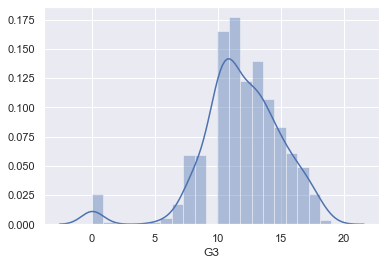

In [166]:
sns.distplot(data['G3'])
plt.show()

In [167]:
#skewness and kurtosis
print("Skewness: %f" % data['G3'].skew())
print("Kurtosis: %f" % data['G3'].kurt())

Skewness: -0.912909
Kurtosis: 2.712204


In [168]:
#The G3 column appears to be moderately skewed

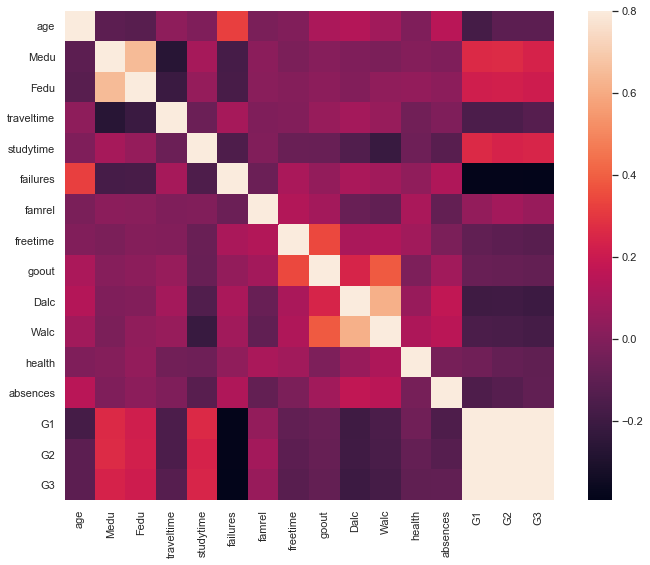

In [169]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

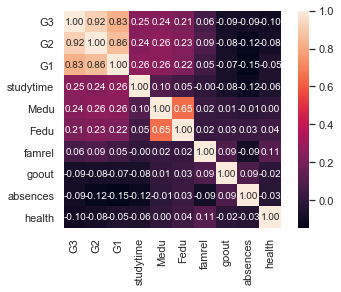

In [170]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'G3')['G3'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [225]:
#We can see a huge correlation between G1, G2 and G3
#This makes sense because the G1 and G2 and interim scores and G3 is the final score given in 3rd period
# We can definitely use a student's previous marks to predict the final marks hence
#We don't drop G1,G2 despite the huge correlation

In [226]:
#Columns 'Medu' and 'Fedu' also seem to have a high correlation and hence we can drop 'Fedu' as its 
#correlation with G3 is lower

In [227]:
data.drop(columns=['Fedu'])

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [228]:
#Now we deal with Missing values (if any)

In [229]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
G3,0,0.0
schoolsup,0,0.0
sex,0,0.0
age,0,0.0
address,0,0.0


In [230]:
#Good News is that we don't have any Missing Values and hence need not drop anymore columns

In [233]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [235]:
X[0]

array(['GP', 'F', 18, 'U', 'GT3', 'A', 4, 4, 'at_home', 'teacher',
       'course', 'mother', 2, 2, 0, 'yes', 'no', 'no', 'no', 'yes', 'yes',
       'no', 'no', 4, 3, 4, 1, 1, 3, 4, 0, 11], dtype=object)

### One hot Encoding

In [236]:
#Looks like we have a number of categorical variables and have to deal with them

In [237]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) 

In [238]:
X[0]

array([1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
       0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0,
       1.0, 0.0, 1.0, 0.0, 18, 4, 4, 2, 2, 0, 4, 3, 4, 1, 1, 3, 4, 0, 11],
      dtype=object)

### Splitting Train and Test Data

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [240]:
X_train.shape

(519, 58)

In [241]:
Y_train.shape

(519,)

In [242]:
X_test.shape

(130, 58)

In [243]:
Y_test.shape

(130,)

### Feature Scaling

In [244]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,43:]=sc.fit_transform(X_train[:,43:])
X_test[:,43:]=sc.transform(X_test[:,43:])

## Comparing different regression models

### Multiple Linear Regression

In [245]:
#Training the Model

from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [246]:
#Predicting the Results

mlr_pred=mlr.predict(X_test)

In [247]:
#Evaluating the Model

print(r2_score(Y_test,mlr_pred))

0.8571519130008025


### Support Vector Regression (SVR)

In [248]:
#Training the model

from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [249]:
#Predicting the Results

svr_pred=svr.predict(X_test)

In [250]:
#Evaluating the model

print(r2_score(Y_test,svr_pred))

0.7196140031841614


### Decision Tree - Regression

In [251]:
#Training the model

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [252]:
#Predicting the results

dt_pred =dt.predict(X_test)

In [253]:
#Evaluating the model

print(r2_score(Y_test,dt_pred))

0.6409077091841455


### Random Forest - Regression

In [254]:
#Training the model

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=2000,random_state=1)
rfr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [255]:
#Predicting the results

rfr_pred = rfr.predict(X_test)

In [256]:
#Evaluating the model

print(r2_score(Y_test,rfr_pred))

0.8399809720735366


##### The most succesful model for this dataset is surprisingly 'Multiple Linear Regression' with a R square value of 0.85